In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

In [8]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [11]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [29]:
cab.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [30]:
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [31]:
customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [32]:
transaction.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [28]:
cus_tra = pd.merge(customer,transaction, on = 'Customer ID')
cus_tra_cab = pd.merge(cus_tra,cab, on = 'Transaction ID')
meta_data = pd.merge(cus_tra_cab,city, on = 'City')
meta_data

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [46]:
meta_data = meta_data.drop_duplicates()
meta_data.isnull().any()

Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
Transaction ID        False
Payment_Mode          False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Population            False
Users                 False
dtype: bool

In [39]:
meta_data.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Transaction ID',
       'Payment_Mode', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

# Feature Engineering 

In [148]:
dataset = meta_data[['City','Gender', 'Age', 'Income (USD/Month)','Date of Travel', \
                     'Company','KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users']]

dataset = dataset.rename(columns={'Gender': 'gender',
                       'Age': 'age',
                       'Income (USD/Month)':'income',
                       'Date of Travel':'date_of_travel',
                       'Company':'company',
                       'KM Travelled':'distance_travelled',
                       'Price Charged':'price', 
                       'Cost of Trip':'cost',
                       'Population':'population',
                       'Users':'user_amount',
                       'City':'city'}, inplace=False)

In [149]:
dataset.city = dataset.city.apply(lambda x: ' '.join(x.split(' ')[:-1]).lower())
dataset['profit'] = dataset.price - dataset.cost
dataset.population = dataset.population.apply(lambda x: x.replace(',','')).astype(int)
dataset.user_amount = dataset.user_amount.apply(lambda x: x.replace(',','')).astype(int)
dataset['user_ratio'] =  dataset.user_amount / dataset.population

In [150]:
dataset

,city,gender,age,income,date_of_travel,company,distance_travelled,price,cost,population,user_amount,profit,user_ratio
0,atlanta,Male,28,10813,42377,Pink Cab,30.45,370.95,313.6350,814885,24701,57.3150,0.030312
1,atlanta,Male,28,10813,43302,Yellow Cab,26.19,598.70,317.4228,814885,24701,281.2772,0.030312
2,atlanta,Male,28,10813,43427,Yellow Cab,42.55,792.05,597.4020,814885,24701,194.6480,0.030312
3,atlanta,Male,27,9237,42375,Pink Cab,28.62,358.52,334.8540,814885,24701,23.6660,0.030312
4,atlanta,Male,27,9237,43211,Yellow Cab,36.38,721.10,467.1192,814885,24701,253.9808,0.030312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,washington,Female,29,6829,43162,Yellow Cab,38.40,668.93,525.3120,418859,127001,143.6180,0.303207
359388,washington,Female,29,6829,43203,Yellow Cab,3.57,67.60,44.5536,418859,127001,23.0464,0.303207
359389,washington,Female,29,6829,43287,Yellow Cab,23.46,331.97,337.8240,418859,127001,-5.8540,0.303207
359390,washington,Female,29,6829,43314,Yellow Cab,27.60,358.23,364.3200,418859,127001,-6.0900,0.303207


In [151]:
dataset.columns

Index(['city', 'gender', 'age', 'income', 'date_of_travel', 'company',
       'distance_travelled', 'price', 'cost', 'population', 'user_amount',
       'profit', 'user_ratio'],
      dtype='object')

# Hypothesis

## Hypothesis 1: Is there a trend indicating which company has the highest profits in different cities?

In [200]:
hypo1 = dataset.groupby(['city','company']).aggregate({'profit':'sum'}).reset_index()
hypo1.head()

,city,company,profit
0,atlanta,Pink Cab,96050.0760
1,atlanta,Yellow Cab,746382.8056
2,austin,Pink Cab,147445.2900
3,austin,Yellow Cab,379255.7352
4,boston,Pink Cab,262001.6980


<AxesSubplot:ylabel='city'>

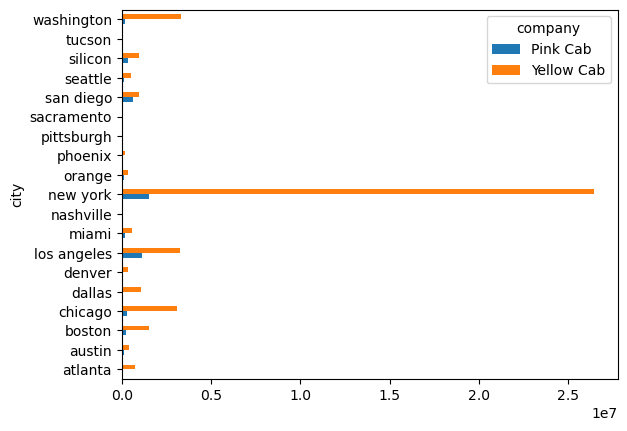

In [201]:
hypo1.pivot(index='city', columns='company', values='profit').plot.barh(rot=0)

### Yellow Cab Company achieves a higher average profit margin than Pink Cab Company in all cities.

## Hypothesis 2: Is there a trend indicating which company has the highest distance travelled in different cities?

In [231]:
hypo2 = dataset.groupby(['city','company']).aggregate({'distance_travelled':'sum'}).reset_index()
hypo2.head()

,city,company,distance_travelled
0,atlanta,Pink Cab,39715.17
1,atlanta,Yellow Cab,128928.59
2,austin,Pink Cab,41038.42
3,austin,Yellow Cab,68168.88
4,boston,Pink Cab,117933.51


<AxesSubplot:ylabel='city'>

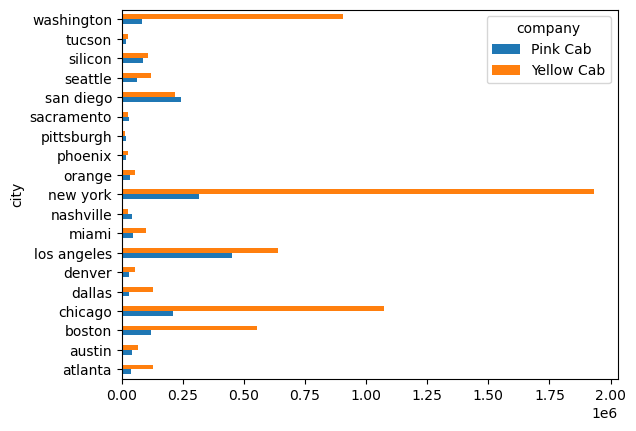

In [232]:
hypo2.pivot(index='city', columns='company', values='distance_travelled').plot.barh(rot=0)

### Yellow Cab Company achieves a higher average travel distance margin than Pink Cab Company in all cities.


## Hypothesis 3: Is there a trend indicating which company has the highest amount of transactions in different cities ?

In [202]:
hypo3 = dataset.groupby(['city','company']).aggregate({'age':'count'}).reset_index()
hypo3.head()

,city,company,age
0,atlanta,Pink Cab,1762
1,atlanta,Yellow Cab,5795
2,austin,Pink Cab,1868
3,austin,Yellow Cab,3028
4,boston,Pink Cab,5186


<AxesSubplot:ylabel='city'>

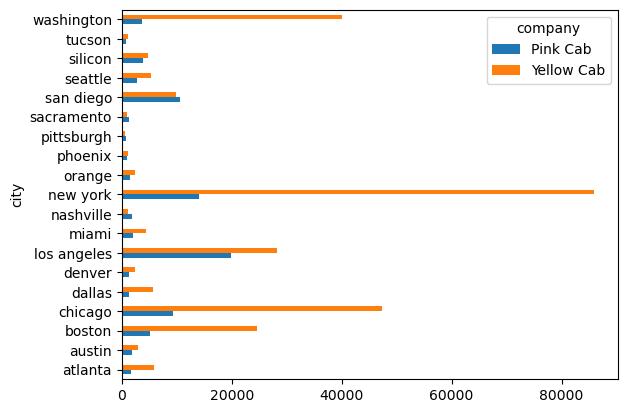

In [203]:
hypo3.pivot(index='city', columns='company', values='age').plot.barh(rot=0)

### Yellow Cab Company achieves a higher amounf of transactions margin than Pink Cab Company in all cities.


## Hypothesis 4: Is there a trend indicating which company's profit gain has changed overtime ?

In [224]:
hypo4 = dataset.groupby(['date_of_travel','company']).aggregate({'profit':'mean'}).reset_index().iloc[-150:]
hypo3.head()

,date_of_travel,company,profit
2040,43391,Pink Cab,41.959798
2041,43391,Yellow Cab,108.642733
2042,43392,Pink Cab,66.140535
2043,43392,Yellow Cab,146.424984
2044,43393,Pink Cab,62.754599


<AxesSubplot:xlabel='date_of_travel'>

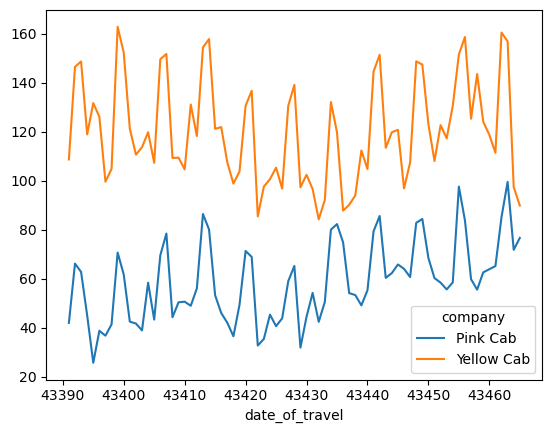

In [225]:
hypo4.pivot(index='date_of_travel', columns='company', values='profit').plot.line(rot=0)

### In the last 150 days, Pink Cab shows a general growing trend in terms of profit gain while Yellow Cab shows a little to no change in the trend of profit gain. The overall profit gain of Yellow Cab is still higher than that of the Pink Cab


## Hypothesis 5: Is there a trend indicating which company has the highest average user income in different cities ?

In [227]:
hypo5 = dataset.groupby(['city','company']).aggregate({'income':'mean'}).reset_index()
hypo5.head()

,city,company,income
0,atlanta,Pink Cab,15033.438706
1,atlanta,Yellow Cab,14902.657981
2,austin,Pink Cab,14863.617773
3,austin,Yellow Cab,14593.396631
4,boston,Pink Cab,15383.779213


<AxesSubplot:ylabel='city'>

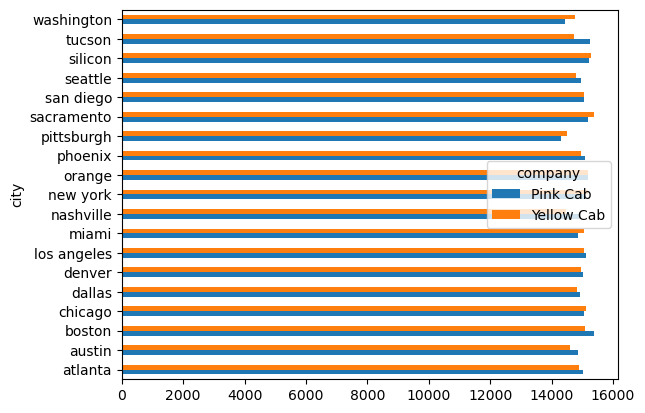

In [228]:
hypo5.pivot(index='city', columns='company', values='income').plot.barh(rot=0)

### Both Companies users have a similer average of income

# Final Recommendation

## It appears that the Yellow Cab company has a higher profit gain than Pink Cab across all cities during the period from January 31, 2016, to December 31, 2018. Concurrently, Yellow Cab has more transactions and a higher amount of distance traveled in each city, indicating that Yellow Cab is more active than Pink Cab. Moreover, Yellow Cab does not show a trend of diminishing values in the last 150 days in terms of profit gain. Finally, the quality of the users is similar between Yellow Cab and Pink Cab. Therefore, it is more advisable to invest in Yellow Cab.